In [15]:
#insert dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

#  Reflect Tables into SQLAlchemy ORM

In [2]:
 # Import Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [5]:
#View autobase classes
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create the session link from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [7]:
#Determine the most recent date in the data set.
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(most_recent.date)


2017-08-23


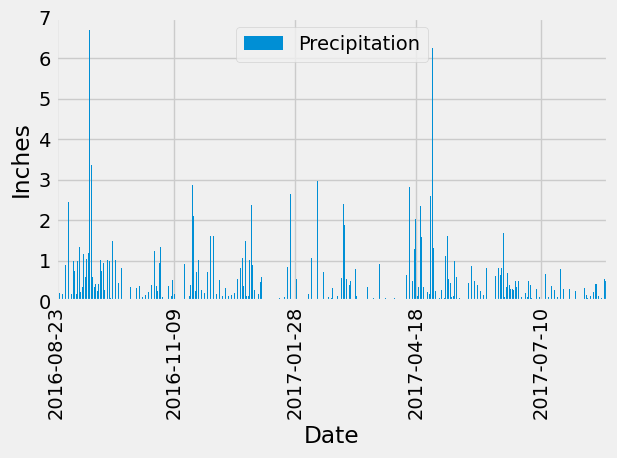

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
one_year = last_date - dt.timedelta(days=365)
one_year

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, func.max(Measurement.prcp)]
precip_data = session.query(*sel).\
    filter(func.date(Measurement.date) <= "2017-08-23").\
    filter(func.date(Measurement.date) >= "2016-08-23").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values("Date")

#Use Pandas Plotting with Matplotlib to plot the data.

tick_one = precip_df.index[precip_df['Date']=='2016-08-23'].tolist()
tick_two = precip_df.index[precip_df['Date']=='2016-11-09'].tolist()
tick_three = precip_df.index[precip_df['Date']=='2017-01-28'].tolist()
tick_four = precip_df.index[precip_df['Date']=='2017-04-18'].tolist()
tick_five = precip_df.index[precip_df['Date']=='2017-07-10'].tolist()

precip_df.plot.bar()
tick_indices = sum([tick_one, tick_two, tick_three, tick_four, tick_five], [])
tick_dates = pd.to_datetime(['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])
tick_labels = [date.strftime('%Y-%m-%d') for date in tick_dates]
plt.xticks(tick_indices, tick_labels)
plt.ylim(0, 7)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()




In [10]:
#find the summary statistics of the precipitation column and imbed them in a table
sel = [Measurement.date, Measurement.prcp]
total_precip_data = session.query(*sel).\
    filter(func.date(Measurement.date) <= last_date).\
    filter(func.date(Measurement.date) >= one_year).\
    filter(Measurement.prcp != None).\
    order_by(Measurement.date).all()

total_precip_df = pd.DataFrame(total_precip_data, columns=['Date', 'Precipitation'])
summary_stat = total_precip_df['Precipitation'].describe()
summary_stat_df = pd.DataFrame(summary_stat, columns=['Precipitation'])
summary_stat_df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station.station).count()
stations

9

In [12]:
 # Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).\
    all()
print(active_station)


[(54.0, 85.0, 71.66378066378067)]


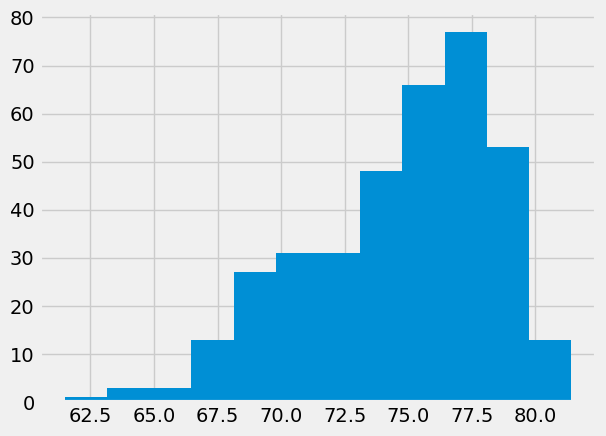

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = dt.date(2017, 8, 23)
one_year = last_date - dt.timedelta(days=365)
sel = [Measurement.date, func.avg(Measurement.tobs)]
temp_data = session.query(*sel).\
    filter(func.date(Measurement.date) <= "2017-08-23").\
    filter(func.date(Measurement.date) >= "2016-08-23").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
temp_df = pd.DataFrame(temp_data, columns=['Date', 'Temperature'])

#Plot the data as a histogram
x_axis = len(temp_df['Date'])
y_axis = temp_df['Temperature']
ax = plt.subplot()
ax.hist(y_axis, bins = 12)
plt.show()

# Close Session

In [22]:
# Close the session
session.close()